In [64]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [65]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/final/SICK/TRAIN_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/SICK/TRAIN_'+str(i+1)+'.csv.pickle')
        train=pd.concat([train,temp])

In [66]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TRAIN.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL
...,...,...,...
4434,A door is being opened by a man,A bald man in a band is playing guitar in the ...,NEUTRAL
4435,Someone is boiling okra in a pot,The man is not playing the drums,NEUTRAL
4436,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,NEUTRAL
4437,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,NEUTRAL


In [67]:
train["clases"]=temp1["entailment_label"]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.932,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"a{a,DET} group{g...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.625000,0.400000,0.214286,0.000000,[old man],[],0.0,NEUTRAL
1,0.000000,0.000000,2.894,0.000,0.000000,0.000000,0.000000,1.000000,2,0,...,"a{a,DET} group{g...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.411765,0.250000,0.066667,0.000000,[man standing],[old man],0.0,NEUTRAL
2,0.000000,0.000000,2.859,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET} kids{kid...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.200000,0.111111,0.000000,0.000000,"[young boys, playing outdoors, smiling nearby]",[playing outdoors],1.0,ENTAILMENT
3,2.291585,457.834625,2.928,2.794,3.988090,0.003281,0.432083,0.565809,0,0,...,"a{a,DET} group{group,...","group{group,NOUN} yar...",0.000000,0.000000,0.000000,0.363636,[playing outdoors],[old man],0.0,NEUTRAL
4,2.910569,473.110077,2.899,2.884,3.975784,0.003537,0.458348,0.580674,0,1,...,"a{a,DET} group{group,...","group{group,NOUN} yar...",0.058824,0.000000,0.000000,0.333333,"[young boys, playing outdoors, smiling nearby]",[old man],0.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.828319,728.090820,2.601,2.169,4.018965,0.003018,0.246681,0.264433,0,0,...,"a{a,DET} bald{bald,ADJ} m...","bald{bald,ADJ} band{band,N...",0.000000,0.000000,0.000000,0.625000,[door is being opened man ],"[bald man, playing guitar, man is playing guit...",0.0,NEUTRAL
35,0.909744,500.009064,2.762,2.480,4.003572,0.003442,0.363223,0.391786,0,0,...,"the{the,DET} man{man,N...","man{man,NOUN} not{not,...",0.000000,0.000000,0.000000,0.571429,"[boiling okra, Someone is boiling okra ]",[man is not playing drums ],0.0,ENTAILMENT
36,1.791371,734.524658,2.608,2.393,3.956678,0.003492,0.343168,0.641573,0,1,...,"a{a,DET} bicyclist{bi...","bicyclist{bicyclist,NO...",0.000000,0.000000,0.000000,0.666667,"[singing heartily, man is singing guitar , man...",[bicyclist is holding bike ],0.0,CONTRADICTION
37,1.782664,237.993408,2.582,2.338,4.077876,0.003658,0.401213,0.274325,0,0,...,"a{a,DET} man{man,NOUN} i...","jumping{jump,VERB} rope{r...",0.200000,0.000000,0.000000,0.181818,"[yellow ball, man has ball ]","[jumping rope, man is jumping rope ]",0.0,CONTRADICTION


In [68]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.932,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"a{a,DET} group{g...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.625000,0.400000,0.214286,0.000000,[old man],[],0.0,NEUTRAL
1,0.000000,0.000000,2.894,0.000,0.000000,0.000000,0.000000,1.000000,2,0,...,"a{a,DET} group{g...","Empty DataFrame Columns: [] Index: [a{a,DET}, ...",0.411765,0.250000,0.066667,0.000000,[man standing],[old man],0.0,NEUTRAL
2,0.000000,0.000000,2.859,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET} kids{kid...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.200000,0.111111,0.000000,0.000000,"[young boys, playing outdoors, smiling nearby]",[playing outdoors],1.0,ENTAILMENT
3,2.291585,457.834625,2.928,2.794,3.988090,0.003281,0.432083,0.565809,0,0,...,"a{a,DET} group{group,...","group{group,NOUN} yar...",0.000000,0.000000,0.000000,0.363636,[playing outdoors],[old man],0.0,NEUTRAL
4,2.910569,473.110077,2.899,2.884,3.975784,0.003537,0.458348,0.580674,0,1,...,"a{a,DET} group{group,...","group{group,NOUN} yar...",0.058824,0.000000,0.000000,0.333333,"[young boys, playing outdoors, smiling nearby]",[old man],0.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.828319,728.090820,2.601,2.169,4.018965,0.003018,0.246681,0.264433,0,0,...,"a{a,DET} bald{bald,ADJ} m...","bald{bald,ADJ} band{band,N...",0.000000,0.000000,0.000000,0.625000,[door is being opened man ],"[bald man, playing guitar, man is playing guit...",0.0,NEUTRAL
4435,0.909744,500.009064,2.762,2.480,4.003572,0.003442,0.363223,0.391786,0,0,...,"the{the,DET} man{man,N...","man{man,NOUN} not{not,...",0.000000,0.000000,0.000000,0.571429,"[boiling okra, Someone is boiling okra ]",[man is not playing drums ],0.0,ENTAILMENT
4436,1.791371,734.524658,2.608,2.393,3.956678,0.003492,0.343168,0.641573,0,1,...,"a{a,DET} bicyclist{bi...","bicyclist{bicyclist,NO...",0.000000,0.000000,0.000000,0.666667,"[singing heartily, man is singing guitar , man...",[bicyclist is holding bike ],0.0,CONTRADICTION
4437,1.782664,237.993408,2.582,2.338,4.077876,0.003658,0.401213,0.274325,0,0,...,"a{a,DET} man{man,NOUN} i...","jumping{jump,VERB} rope{r...",0.200000,0.000000,0.000000,0.181818,"[yellow ball, man has ball ]","[jumping rope, man is jumping rope ]",0.0,CONTRADICTION


<Axes: title={'center': 'list_trigram'}, xlabel='clases'>

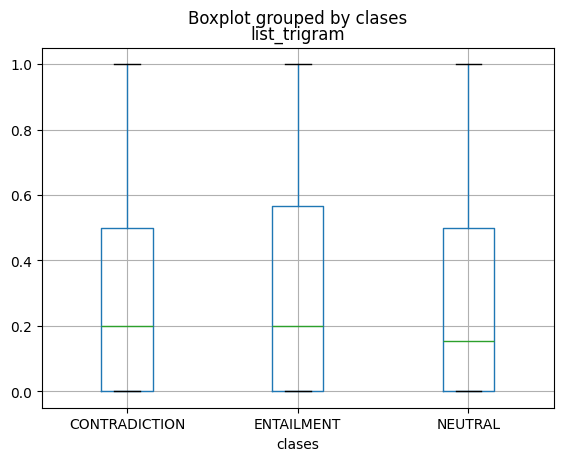

In [69]:
train.boxplot(by="clases",column="list_trigram")

## Eliminar características

In [70]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.932,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,17,0,18,0.625000,0.400000,0.214286,0.000000,0.0,NEUTRAL
1,0.000000,0.000000,2.894,0.000,0.000000,0.000000,0.000000,1.000000,2,0,1,18,0,18,0.411765,0.250000,0.066667,0.000000,0.0,NEUTRAL
2,0.000000,0.000000,2.859,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,11,0,12,0.200000,0.111111,0.000000,0.000000,1.0,ENTAILMENT
3,2.291585,457.834625,2.928,2.794,3.988090,0.003281,0.432083,0.565809,0,0,1,18,4,11,0.000000,0.000000,0.000000,0.363636,0.0,NEUTRAL
4,2.910569,473.110077,2.899,2.884,3.975784,0.003537,0.458348,0.580674,0,1,1,18,4,12,0.058824,0.000000,0.000000,0.333333,0.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.828319,728.090820,2.601,2.169,4.018965,0.003018,0.246681,0.264433,0,0,0,12,5,8,0.000000,0.000000,0.000000,0.625000,0.0,NEUTRAL
4435,0.909744,500.009064,2.762,2.480,4.003572,0.003442,0.363223,0.391786,0,0,0,7,4,7,0.000000,0.000000,0.000000,0.571429,0.0,ENTAILMENT
4436,1.791371,734.524658,2.608,2.393,3.956678,0.003492,0.343168,0.641573,0,1,0,14,6,9,0.000000,0.000000,0.000000,0.666667,0.0,CONTRADICTION
4437,1.782664,237.993408,2.582,2.338,4.077876,0.003658,0.401213,0.274325,0,0,0,6,2,11,0.200000,0.000000,0.000000,0.181818,0.0,CONTRADICTION


In [71]:
train=train.drop(["entropias","max_info","similitud_faltantes","distancias","list_trigram","list_cuatrigram","sumas","diferencias"],axis=1)

In [72]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [73]:
#train=train.drop(["Total T"],axis=1)

In [74]:
train

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases
0,2.932,0.000000,0.000000,0,0,1,17,0,18,0.625000,0.0,NEUTRAL
1,2.894,0.000000,0.000000,2,0,1,18,0,18,0.411765,0.0,NEUTRAL
2,2.859,0.000000,0.000000,0,0,1,11,0,12,0.200000,1.0,ENTAILMENT
3,2.928,3.988090,0.003281,0,0,1,18,4,11,0.000000,0.0,NEUTRAL
4,2.899,3.975784,0.003537,0,1,1,18,4,12,0.058824,0.0,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2.601,4.018965,0.003018,0,0,0,12,5,8,0.000000,0.0,NEUTRAL
4435,2.762,4.003572,0.003442,0,0,0,7,4,7,0.000000,0.0,ENTAILMENT
4436,2.608,3.956678,0.003492,0,1,0,14,6,9,0.000000,0.0,CONTRADICTION
4437,2.582,4.077876,0.003658,0,0,0,6,2,11,0.200000,0.0,CONTRADICTION


In [75]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [76]:
y_train=y_

In [77]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [78]:
train_m

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel
entropia_total,1.000000,0.056967,0.018539,0.039541,0.056787,0.118836,0.375699,0.087006,0.369225,-0.085202,0.062781
mutinf,0.056967,1.000000,0.700134,0.010770,0.042046,0.122194,0.167542,0.683273,0.057615,-0.530920,-0.302635
mearts,0.018539,0.700134,1.000000,-0.004085,0.042130,0.083740,0.099865,0.510248,-0.002910,-0.395204,-0.205909
list_comp,0.039541,0.010770,-0.004085,1.000000,-0.057694,0.032116,0.082550,0.039987,0.036908,-0.182455,-0.118821
list_incomp,0.056787,0.042046,0.042130,-0.057694,1.000000,0.030697,0.113231,0.089041,0.043504,-0.199166,-0.090620
list_rel_con,0.118836,0.122194,0.083740,0.032116,0.030697,1.000000,0.213310,0.191421,0.110098,-0.272501,-0.157984
list_M,0.375699,0.167542,0.099865,0.082550,0.113231,0.213310,1.000000,0.389673,0.657757,0.037070,0.213074
list_m,0.087006,0.683273,0.510248,0.039987,0.089041,0.191421,0.389673,1.000000,0.097060,-0.591193,-0.299405
list_T,0.369225,0.057615,-0.002910,0.036908,0.043504,0.110098,0.657757,0.097060,1.000000,0.119481,0.216978
list_bigram,-0.085202,-0.530920,-0.395204,-0.182455,-0.199166,-0.272501,0.037070,-0.591193,0.119481,1.000000,0.552483


<Axes: >

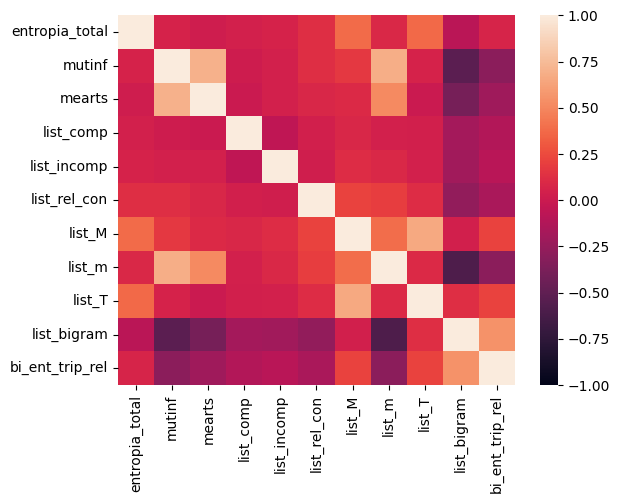

In [79]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [80]:
train_m

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel
entropia_total,1.000000,0.056967,0.018539,0.039541,0.056787,0.118836,0.375699,0.087006,0.369225,-0.085202,0.062781
mutinf,0.056967,1.000000,0.700134,0.010770,0.042046,0.122194,0.167542,0.683273,0.057615,-0.530920,-0.302635
mearts,0.018539,0.700134,1.000000,-0.004085,0.042130,0.083740,0.099865,0.510248,-0.002910,-0.395204,-0.205909
list_comp,0.039541,0.010770,-0.004085,1.000000,-0.057694,0.032116,0.082550,0.039987,0.036908,-0.182455,-0.118821
list_incomp,0.056787,0.042046,0.042130,-0.057694,1.000000,0.030697,0.113231,0.089041,0.043504,-0.199166,-0.090620
list_rel_con,0.118836,0.122194,0.083740,0.032116,0.030697,1.000000,0.213310,0.191421,0.110098,-0.272501,-0.157984
list_M,0.375699,0.167542,0.099865,0.082550,0.113231,0.213310,1.000000,0.389673,0.657757,0.037070,0.213074
list_m,0.087006,0.683273,0.510248,0.039987,0.089041,0.191421,0.389673,1.000000,0.097060,-0.591193,-0.299405
list_T,0.369225,0.057615,-0.002910,0.036908,0.043504,0.110098,0.657757,0.097060,1.000000,0.119481,0.216978
list_bigram,-0.085202,-0.530920,-0.395204,-0.182455,-0.199166,-0.272501,0.037070,-0.591193,0.119481,1.000000,0.552483


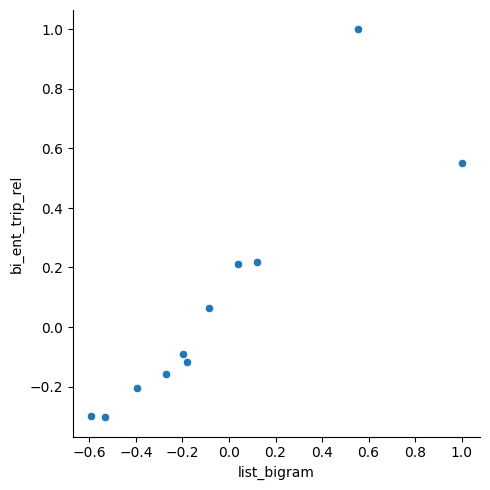

In [81]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [82]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [83]:
# SICK
# y_train=[]
# for i in y_:
#     if i == "ENTAILMENT":
#         y_train.append(1)
#     else:
#         y_train.append(0)

In [84]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

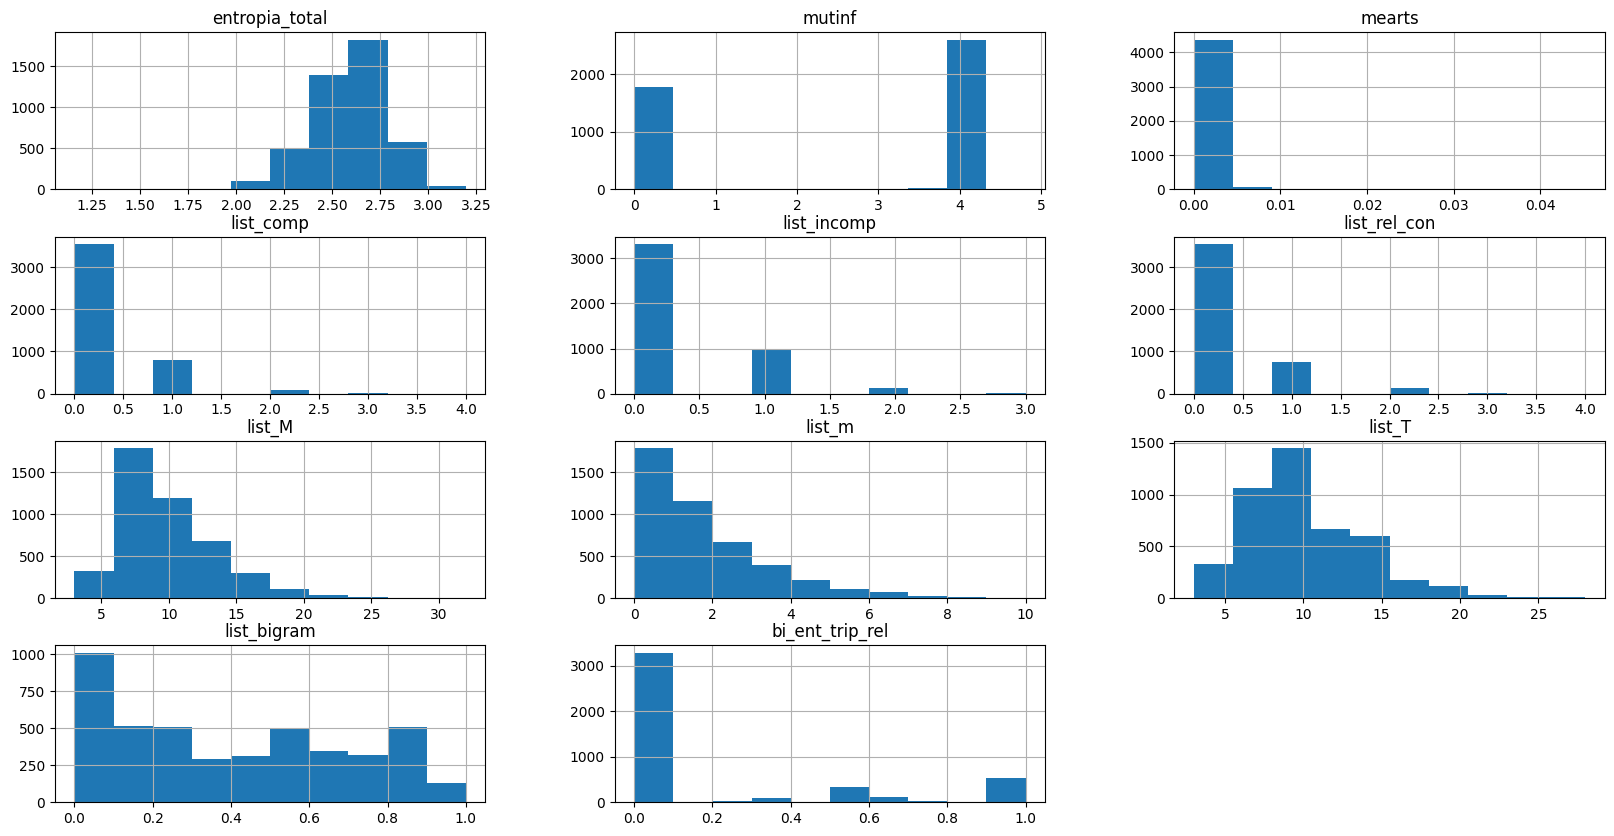

In [85]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [86]:
for i in range(5):
    if i==0:
        test = pd.read_pickle('salida/final/SICK/DEV_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/SICK/DEV_'+str(i+1)+'.csv.pickle')
        test=pd.concat([test,temp])

In [87]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,3.605652,225.758621,2.741,1.555,3.941432,0.003794,0.386542,0.543120,0,0,...,"there{there,PRON} is{...","there{there,PRON} the...",0.222222,0.111111,0.0,0.166667,"[young boys, playing outdoors, smiling nearby]","[boy playing, playing outdoors, man smiling]",0.333333,CONTRADICTION
1,2.779888,361.470581,2.327,2.197,3.941482,0.003228,0.494637,0.500553,1,0,...,"a{a,DET} skilled{s...","skilled{skilled,ADJ...",0.000000,0.000000,0.0,0.250000,"[black jacket, person is doing tricks ]","[skilled person, person is riding bicycle ]",0.000000,CONTRADICTION
2,2.189246,221.549362,2.737,2.055,4.052635,0.003606,0.462560,0.594649,0,1,...,"four{four,NUM} girl...","playing{play,VERB} ...",0.285714,0.166667,0.0,0.250000,[children are doing backbends ],"[playing outdoors, girls are doing backbends ]",0.000000,CONTRADICTION
3,1.578712,623.144470,2.760,2.680,4.029399,0.003294,0.501315,0.492765,0,0,...,"two{two,NUM} teams{team...","two{two,NUM} teams{team...",0.000000,0.000000,0.0,0.833333,[player is throwing ball ],[football match],0.000000,CONTRADICTION
4,0.000000,0.000000,2.631,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"five{five,NUM} children...","Empty DataFrame Columns: [] Index: [five{five,...",0.857143,0.666667,0.4,0.000000,[wooden hut],[wooden hut],1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1.589165,362.169067,2.493,1.965,4.001886,0.003257,0.387882,0.444004,0,0,...,"a{a,DET} man{man,NOUN} is...","man{man,NOUN} dancing{danc...",0.000000,0.000000,0.0,0.375000,[riding away],[],0.000000,CONTRADICTION
491,0.446446,170.074402,2.586,1.950,3.932146,0.003551,0.404658,0.051748,0,0,...,"a{a,DET} kid{kid,NOUN...","kid{kid,NOUN} a{a,DET}...",0.250000,0.000000,0.0,0.142857,"[electric guitar, woman is playing guitar ]","[playing guitar, kid is playing guitar ]",0.000000,CONTRADICTION
492,0.816976,500.037201,2.833,2.635,3.975342,0.003465,0.234832,0.261147,0,0,...,"the{the,DET} cop{cop,NOU...","cop{cop,NOUN} sitting{si...",0.000000,0.000000,0.0,0.571429,[],[police bike],0.000000,CONTRADICTION
493,1.494227,264.360046,2.602,2.328,3.884337,0.003827,0.339163,0.290114,0,0,...,"a{a,DET} girl{girl,NO...","band{band,NOUN} instr...",0.000000,0.000000,0.0,0.222222,[],[girl is playing instrument ],0.000000,CONTRADICTION


In [88]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_DEV.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,The young boys are playing outdoors and the ma...,There is no boy playing outdoors and there is ...,CONTRADICTION
1,A person in a black jacket is doing tricks on ...,A skilled person is riding a bicycle on one wheel,NEUTRAL
2,Four children are doing backbends in the gym,Four girls are doing backbends and playing out...,NEUTRAL
3,A player is throwing the ball,Two teams are competing in a football match,NEUTRAL
4,Five children are standing in front of a woode...,Five children are standing in a wooden hut,NEUTRAL
...,...,...,...
490,A biker is riding away from a fence,A man is dancing on the road,NEUTRAL
491,A woman is playing an electric guitar,A kid is playing guitar,NEUTRAL
492,The animal is grazing on the grass,The cop is sitting on a police bike,NEUTRAL
493,The dog is snapping at some droplets of water,A girl in a band is playing an instrument,NEUTRAL


In [89]:
test["clases"]=temp1["entailment_label"]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,3.605652,225.758621,2.741,1.555,3.941432,0.003794,0.386542,0.543120,0,0,...,"there{there,PRON} is{...","there{there,PRON} the...",0.222222,0.111111,0.0,0.166667,"[young boys, playing outdoors, smiling nearby]","[boy playing, playing outdoors, man smiling]",0.333333,CONTRADICTION
1,2.779888,361.470581,2.327,2.197,3.941482,0.003228,0.494637,0.500553,1,0,...,"a{a,DET} skilled{s...","skilled{skilled,ADJ...",0.000000,0.000000,0.0,0.250000,"[black jacket, person is doing tricks ]","[skilled person, person is riding bicycle ]",0.000000,NEUTRAL
2,2.189246,221.549362,2.737,2.055,4.052635,0.003606,0.462560,0.594649,0,1,...,"four{four,NUM} girl...","playing{play,VERB} ...",0.285714,0.166667,0.0,0.250000,[children are doing backbends ],"[playing outdoors, girls are doing backbends ]",0.000000,NEUTRAL
3,1.578712,623.144470,2.760,2.680,4.029399,0.003294,0.501315,0.492765,0,0,...,"two{two,NUM} teams{team...","two{two,NUM} teams{team...",0.000000,0.000000,0.0,0.833333,[player is throwing ball ],[football match],0.000000,NEUTRAL
4,0.000000,0.000000,2.631,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"five{five,NUM} children...","Empty DataFrame Columns: [] Index: [five{five,...",0.857143,0.666667,0.4,0.000000,[wooden hut],[wooden hut],1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1.589165,362.169067,2.493,1.965,4.001886,0.003257,0.387882,0.444004,0,0,...,"a{a,DET} man{man,NOUN} is...","man{man,NOUN} dancing{danc...",0.000000,0.000000,0.0,0.375000,[riding away],[],0.000000,NEUTRAL
491,0.446446,170.074402,2.586,1.950,3.932146,0.003551,0.404658,0.051748,0,0,...,"a{a,DET} kid{kid,NOUN...","kid{kid,NOUN} a{a,DET}...",0.250000,0.000000,0.0,0.142857,"[electric guitar, woman is playing guitar ]","[playing guitar, kid is playing guitar ]",0.000000,NEUTRAL
492,0.816976,500.037201,2.833,2.635,3.975342,0.003465,0.234832,0.261147,0,0,...,"the{the,DET} cop{cop,NOU...","cop{cop,NOUN} sitting{si...",0.000000,0.000000,0.0,0.571429,[],[police bike],0.000000,NEUTRAL
493,1.494227,264.360046,2.602,2.328,3.884337,0.003827,0.339163,0.290114,0,0,...,"a{a,DET} girl{girl,NO...","band{band,NOUN} instr...",0.000000,0.000000,0.0,0.222222,[],[girl is playing instrument ],0.000000,NEUTRAL


In [90]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases
0,3.605652,225.758621,2.741,1.555,3.941432,0.003794,0.386542,0.543120,0,0,0,12,2,12,0.222222,0.111111,0.0,0.166667,0.333333,CONTRADICTION
1,2.779888,361.470581,2.327,2.197,3.941482,0.003228,0.494637,0.500553,1,0,1,10,3,12,0.000000,0.000000,0.0,0.250000,0.000000,NEUTRAL
2,2.189246,221.549362,2.737,2.055,4.052635,0.003606,0.462560,0.594649,0,1,0,8,2,8,0.285714,0.166667,0.0,0.250000,0.000000,NEUTRAL
3,1.578712,623.144470,2.760,2.680,4.029399,0.003294,0.501315,0.492765,0,0,0,8,5,6,0.000000,0.000000,0.0,0.833333,0.000000,NEUTRAL
4,0.000000,0.000000,2.631,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,10,0.857143,0.666667,0.4,0.000000,1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1.589165,362.169067,2.493,1.965,4.001886,0.003257,0.387882,0.444004,0,0,0,7,3,8,0.000000,0.000000,0.0,0.375000,0.000000,NEUTRAL
491,0.446446,170.074402,2.586,1.950,3.932146,0.003551,0.404658,0.051748,0,0,0,5,1,7,0.250000,0.000000,0.0,0.142857,0.000000,NEUTRAL
492,0.816976,500.037201,2.833,2.635,3.975342,0.003465,0.234832,0.261147,0,0,0,8,4,7,0.000000,0.000000,0.0,0.571429,0.000000,NEUTRAL
493,1.494227,264.360046,2.602,2.328,3.884337,0.003827,0.339163,0.290114,0,0,2,9,2,9,0.000000,0.000000,0.0,0.222222,0.000000,NEUTRAL


In [91]:
test=test.drop(["entropias","max_info","similitud_faltantes","distancias","list_trigram","list_cuatrigram","sumas","diferencias"],axis=1)
test

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases
0,2.741,3.941432,0.003794,0,0,0,12,2,12,0.222222,0.333333,CONTRADICTION
1,2.327,3.941482,0.003228,1,0,1,10,3,12,0.000000,0.000000,NEUTRAL
2,2.737,4.052635,0.003606,0,1,0,8,2,8,0.285714,0.000000,NEUTRAL
3,2.760,4.029399,0.003294,0,0,0,8,5,6,0.000000,0.000000,NEUTRAL
4,2.631,0.000000,0.000000,0,0,0,8,0,10,0.857143,1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...
490,2.493,4.001886,0.003257,0,0,0,7,3,8,0.000000,0.000000,NEUTRAL
491,2.586,3.932146,0.003551,0,0,0,5,1,7,0.250000,0.000000,NEUTRAL
492,2.833,3.975342,0.003465,0,0,0,8,4,7,0.000000,0.000000,NEUTRAL
493,2.602,3.884337,0.003827,0,0,2,9,2,9,0.000000,0.000000,NEUTRAL


In [92]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [93]:
test

,entropia_total,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,bi_ent_trip_rel,clases
0,2.741,3.941432,0.003794,0,0,0,12,2,12,0.222222,0.333333,CONTRADICTION
1,2.327,3.941482,0.003228,1,0,1,10,3,12,0.000000,0.000000,NEUTRAL
2,2.737,4.052635,0.003606,0,1,0,8,2,8,0.285714,0.000000,NEUTRAL
3,2.760,4.029399,0.003294,0,0,0,8,5,6,0.000000,0.000000,NEUTRAL
4,2.631,0.000000,0.000000,0,0,0,8,0,10,0.857143,1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...
490,2.493,4.001886,0.003257,0,0,0,7,3,8,0.000000,0.000000,NEUTRAL
491,2.586,3.932146,0.003551,0,0,0,5,1,7,0.250000,0.000000,NEUTRAL
492,2.833,3.975342,0.003465,0,0,0,8,4,7,0.000000,0.000000,NEUTRAL
493,2.602,3.884337,0.003827,0,0,2,9,2,9,0.000000,0.000000,NEUTRAL


In [94]:
#test=test.drop(["Total T"],axis=1)

In [95]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [96]:
y_test=y_t

In [97]:
# SICK
# y_test=[]
# for i in y_t:
#     if i == "ENTAILMENT":
#         y_test.append(1)
#     else:
#         y_test.append(0)

In [98]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [99]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [100]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [101]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [102]:
X_train.shape

(4439, 11)

In [103]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [104]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:
model.decision_function(X)

array([[-0.57272446, -0.4482029 ,  1.02092736],
       [-0.8360922 , -0.30854493,  1.14463713],
       [-0.64245102, -0.50924357,  1.15169459],
       ...,
       [-0.55332581, -0.55486976,  1.10819557],
       [-0.62862343, -0.50566859,  1.13429202],
       [-0.73242973, -0.5234447 ,  1.25587442]])

In [106]:
labels=train.columns[:-1]
labels

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'bi_ent_trip_rel'],
      dtype='object')

In [107]:
model.classes_

array(['CONTRADICTION', 'ENTAILMENT', 'NEUTRAL'], dtype=object)

In [108]:
model.coef_[0]

array([ 0.08950296, -0.03872203, -0.28933438, -0.49490486, -0.01812357,
       -0.44549293,  0.19613368,  0.13687696,  0.07746488,  0.09839202,
        0.02750843])

In [109]:
coeficientes=model.coef_[0]

In [110]:
coeficientes

array([ 0.08950296, -0.03872203, -0.28933438, -0.49490486, -0.01812357,
       -0.44549293,  0.19613368,  0.13687696,  0.07746488,  0.09839202,
        0.02750843])

In [111]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  6 list_M 3 list_comp


In [112]:
n_columns=train.shape[1]-1

In [113]:
n_columns

11

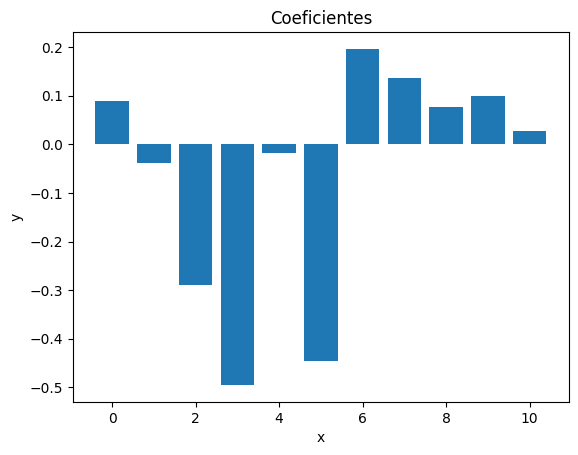

In [114]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [115]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [116]:
X_test.shape

(495, 11)

In [117]:
predictions = model.predict(X_test)

In [118]:
print(confusion_matrix(y_test, predictions,labels=["ENTAILMENT","NEUTRAL","CONTRADICTION"]))

[[  0 143   0]
 [  0 281   0]
 [  0  71   0]]


In [121]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.57
precision:  0.32
recall 0.57
f1_score:  0.41
matthews_score:  0.0


/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
X_train.shape

(4439, 11)

In [123]:
X_test.shape

(495, 11)

In [124]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [125]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [126]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/rit/lib/python3.9/s

Logistic Regression Acurracy:: 0.710000 (0.049244)
Logistic Regression Precision:: 0.500000 (0.062090)
Logistic Regression Recall:: 0.710000 (0.049244)
Logistic Regression F1-score:: 0.580000 (0.061278)


In [129]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.000000 (0.000000)


In [130]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [131]:
#linear_model

In [132]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [134]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict,zero_division=0))

               precision    recall  f1-score   support

CONTRADICTION       0.00      0.00      0.00        71
   ENTAILMENT       0.00      0.00      0.00       143
      NEUTRAL       0.57      1.00      0.72       281

     accuracy                           0.57       495
    macro avg       0.19      0.33      0.24       495
 weighted avg       0.32      0.57      0.41       495



In [135]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [136]:
test.columns[:-1]

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'bi_ent_trip_rel'],
      dtype='object')

In [137]:
explainer.expected_value

array([-0.63004329, -0.46626727,  1.09631056])

In [138]:
X_test

array([[0.90402375, 0.9563426 , 0.08601659, ..., 0.4       , 0.22222222,
        0.33333333],
       [0.76748021, 0.95635493, 0.07318028, ..., 0.4       , 0.        ,
        0.        ],
       [0.90270449, 0.9833247 , 0.08176339, ..., 0.26666667, 0.28571429,
        0.        ],
       ...,
       [0.93436675, 0.96457046, 0.07856047, ..., 0.23333333, 0.        ,
        0.        ],
       [0.85817942, 0.94248934, 0.08676514, ..., 0.3       , 0.        ,
        0.        ],
       [0.74934037, 0.97160083, 0.0928744 , ..., 0.4       , 0.        ,
        0.        ]])

In [139]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [140]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.8512533  0.95825974 0.06028657 0.5        0.         0.
 0.34615385 0.09090909 0.3        0.5        0.        ] NEUTRAL NEUTRAL


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

[0.91193931 0.9423222  0.06960081 0.         0.         0.
 0.46153846 0.18181818 0.46666667 0.18181818 0.        ]


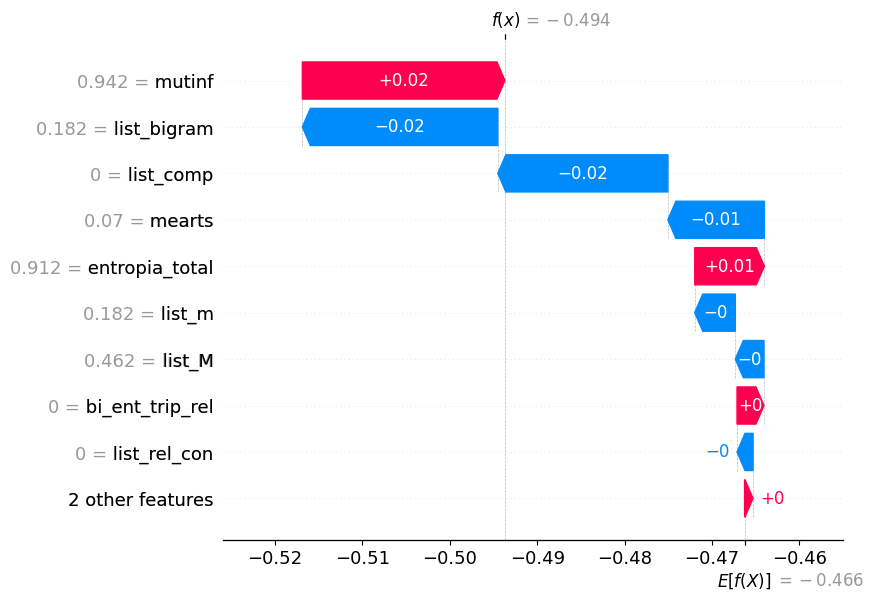

In [141]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

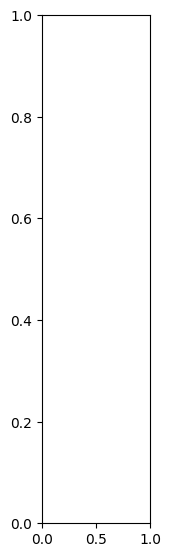

In [142]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

TypeError: only integer scalar arrays can be converted to a scalar index

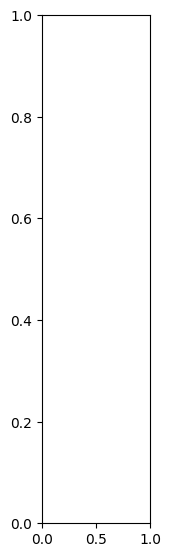

In [143]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

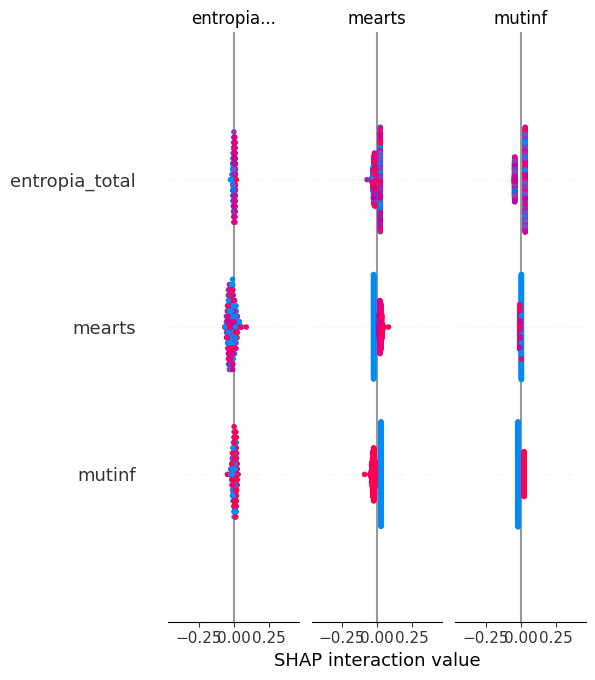

In [144]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [145]:
shap_values[2:,]

.values =
array([[[ 0.00745521,  0.00717281, -0.01462802],
        [-0.02176313,  0.02501167, -0.00324854],
        [-0.01244268, -0.0153962 ,  0.02783888],
        ...,
        [-0.00706406, -0.00101219,  0.00807625],
        [-0.0122869 , -0.01221174,  0.02449864],
        [-0.00449304,  0.00308258,  0.00141047]],

       [[ 0.00813416,  0.00782604, -0.0159602 ],
        [-0.02154482,  0.02476078, -0.00321596],
        [-0.01039353, -0.01286064,  0.02325418],
        ...,
        [-0.01222839, -0.00175217,  0.01398055],
        [-0.0403989 , -0.04015178,  0.08055068],
        [-0.00449304,  0.00308258,  0.00141047]],

       [[ 0.00432615,  0.00416228, -0.00848842],
        [ 0.0163132 , -0.01874824,  0.00243504],
        [ 0.01121428,  0.01387621, -0.02509048],
        ...,
        [-0.00189973, -0.00027221,  0.00217194],
        [ 0.04393711,  0.04366834, -0.08760545],
        [ 0.02301539, -0.01579034, -0.00722505]],

       ...,

       [[ 0.01028908,  0.00989933, -0.02018841],
 

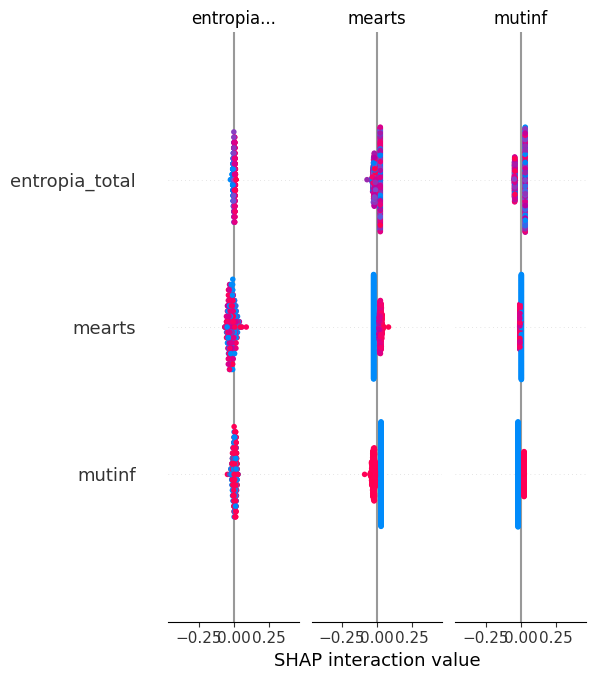

In [146]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [147]:
explainer.expected_value

array([-0.63004329, -0.46626727,  1.09631056])

In [148]:
shap_values.shape

(495, 11, 3)

# Árbol de decisión

In [149]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [150]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [152]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred,average='weighted'),2))
print("recall",round(recall_score(y_test,y_pred,average='weighted'),2))
print("f1_score: ",round(f1_score(y_test,y_pred,average='weighted'),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.42
precision:  0.41
recall 0.42
f1_score:  0.41
matthews_score:  -0.01


In [153]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [155]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.560000 (0.044724)
DecisionTree: 0.540000 (0.023939)
DecisionTree: 0.550000 (0.035004)


In [156]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[ 19,  11,  41],
       [ 37,  20,  86],
       [ 61,  53, 167]])

Profundidad del árbol: 32
Número de nodos terminales: 2161


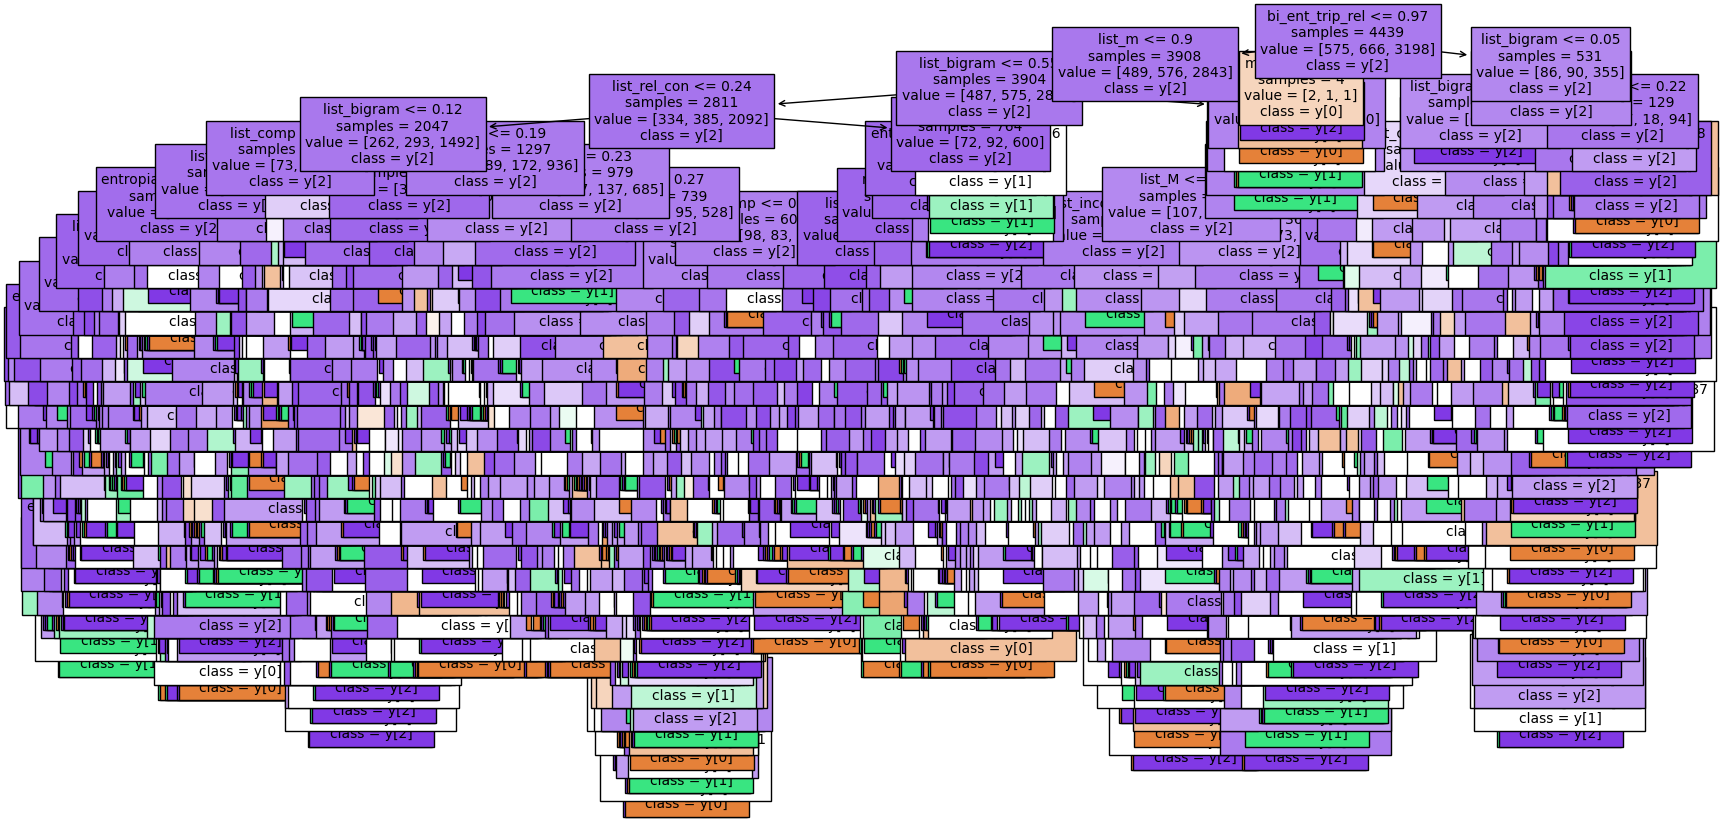

In [157]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )